In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dropped below columns because they only have one value for all rows.

In [16]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], inplace=True)

In [20]:
dfColumns = []
for i in df.columns:
    dfColumns.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(dfColumns, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[1, 0]"
2,BusinessTravel,3,"[1, 2, 0]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."
9,EnvironmentSatisfaction,4,"[2, 3, 4, 1]"


In [11]:
df['Attrition']=df['Attrition'].replace(['No', 'Yes'],[0,1])

In [13]:
df['BusinessTravel']=df['BusinessTravel'].replace(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],[0,1,2])

In [18]:
df['Gender']=df['Gender'].replace(['Male', 'Female'],[0,1])

In [21]:
cat_feats =  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [143]:
df_new = pd.get_dummies(df, columns = cat_feats)
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,2,3,61,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,4,92,2,1,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,5,4,56,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,7,1,40,3,1,...,0,0,0,0,0,0,1,0,1,0


In [142]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [105]:
y_target = df_new.pop("Attrition")

In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

In [118]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_new)

In [124]:
y_kmeans = kmeans.fit_predict(df_new)

In [145]:
pca = PCA(n_components=3).fit(df_new)
pca_3 = pca.transform(df_new)

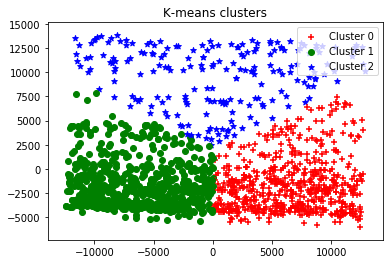

In [146]:
for i in range(0, pca_3.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(pca_3[i,0],pca_3[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(pca_3[i,0],pca_3[i,1],c='g',marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(pca_3[i,0],pca_3[i,1],c='b',marker='*')
pl.legend([c1,c2,c3],['Cluster 0', 'Cluster 1', 'Cluster 2'])
pl.title('K-means clusters')
pl.show()

In [147]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [131]:
from sklearn.metrics.cluster import contingency_matrix
x = kmeans.labels_
y = y_target
contingency_matrix(x,y)

array([[512, 110],
       [533, 112],
       [188,  15]])

The contingency matrix columns: no attrition, attrition.
The rows: Cluster 0, Cluster 1, Cluster 2.
Based on this analysis, cluster 0 and cluster 1 have a much greater attrition percentage than cluster 2. May want to try cluster on some specific features and see how results compare to pca.

In [135]:
df_cl0 = df_new[kmeans.labels_ == 0]
df_cl1 = df_new[kmeans.labels_ == 1]
df_cl2 = df_new[kmeans.labels_ == 2]

In [137]:
df_cl0.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,...,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,35.678457,797.212219,9.302251,2.850482,1029.302251,2.770096,65.430868,2.712219,1.784566,2.744373,...,0.104502,0.020900,0.221865,0.244373,0.067524,0.218650,0.432476,0.348875,0.710611,0.289389
std,8.730874,397.161503,7.895980,1.056454,603.155515,1.091708,20.462704,0.732814,0.754089,1.085963,...,0.306156,0.143166,0.415835,0.430061,0.251129,0.413663,0.495818,0.476998,0.453844,0.453844
min,18.000000,104.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.250000,473.000000,2.000000,2.000000,495.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,775.500000,7.000000,3.000000,1024.500000,3.000000,65.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,41.000000,1144.000000,15.000000,4.000000,1561.750000,4.000000,84.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1496.000000,29.000000,5.000000,2062.000000,4.000000,100.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
df_cl1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,...,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,35.179845,804.672868,9.229457,2.944186,1034.889922,2.674419,66.423256,2.733333,1.683721,2.713178,...,0.099225,0.001550,0.238760,0.240310,0.063566,0.218605,0.462016,0.319380,0.727132,0.272868
std,8.300372,407.469223,8.152853,0.993762,613.312945,1.091773,20.198604,0.702848,0.710917,1.122842,...,0.299196,0.039375,0.426656,0.427603,0.244167,0.413620,0.498942,0.466598,0.445779,0.445779
min,18.000000,103.000000,1.000000,1.000000,4.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,464.000000,2.000000,2.000000,491.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,828.000000,7.000000,3.000000,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,40.000000,1168.000000,14.000000,4.000000,1599.000000,4.000000,83.000000,3.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df_cl2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.0,203.000000,203.0,203.000000,203.000000,203.000000,203.000000,203.000000
mean,46.280788,811.694581,8.738916,3.004926,979.418719,2.724138,65.610837,2.773399,4.128079,2.729064,...,0.078818,0.325123,0.0,0.093596,0.0,0.246305,0.522167,0.231527,0.704433,0.295567
std,7.102152,411.862920,8.608988,1.012289,561.813380,1.100296,20.394410,0.673311,0.753441,1.094764,...,0.270120,0.469579,0.0,0.291986,0.0,0.431924,0.500743,0.422851,0.457425,0.457425
min,27.000000,102.000000,1.000000,1.000000,23.000000,1.000000,30.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,449.500000,2.000000,2.000000,464.500000,2.000000,49.000000,2.000000,4.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,798.000000,6.000000,3.000000,1015.000000,3.000000,65.000000,3.000000,4.000000,3.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000
75%,52.000000,1205.500000,12.000000,4.000000,1415.000000,4.000000,83.000000,3.000000,5.000000,4.000000,...,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,60.000000,1490.000000,29.000000,5.000000,2056.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the description, Cluster 2 has older average age and a higher married percentage than the other two clusters. This may mean that married people want more job security and are less likely to quit. Cluster 2 also has a high percentage of Research Directors relative to the other clusters.